In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [8]:
from pathlib import Path

import requests
from PIL import Image

from segmenter_api.domain.factory.detector_factory import DetectorType
from segmenter_api.domain.factory.segmenter_factory import SegmenterType
from segmenter_api.usecase.ui.foreground_segment import (
    ForegroundSegmentRequest,
)
from segmenter_api.usecase.ui.text2segment import (
    Text2SegmentRequest,
)
from segmenter_api.utils.image import boolean2image, pil2base64

In [3]:
text2segment_url = "http://localhost:8080/text2segment"
foreground_segment_url = "http://localhost:8080/foreground_segment"

In [4]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path)

In [5]:
# Text2Segment

In [9]:
text2segment_request = Text2SegmentRequest(
    detector_type=DetectorType.FLORENCE2,
    segmenter_type=SegmenterType.SAM2,
    image=pil2base64(image=image),
    texts=["plastic bottle", "green character"],
)

In [10]:
text2segment_request_data = text2segment_request.model_dump()

In [11]:
print(text2segment_request_data["detector_type"])
print(text2segment_request_data["segmenter_type"])
print(text2segment_request_data["image"][:30])
print(text2segment_request_data["texts"])

florence2
sam2
iVBORw0KGgoAAAANSUhEUgAABAAAAA
['plastic bottle', 'green character']


In [12]:
text2segment_response = requests.post(text2segment_url, json=text2segment_request_data)
text2segment_response_data = text2segment_response.json()
text2segment_boolean_masks = text2segment_response_data["masks"]
text2segment_mask_images = [
    boolean2image(boolean_mask) for boolean_mask in text2segment_boolean_masks
]

In [10]:
text2segment_response.text

'{"message":"Unable to generate pydantic-core schema for <class \'PIL.Image.Image\'>. Set `arbitrary_types_allowed=True` in the model_config to ignore this error or implement `__get_pydantic_core_schema__` on your type to fully support it.\\n\\nIf you got this error by calling handler(<some type>) within `__get_pydantic_core_schema__` then you likely need to call `handler.generate_schema(<some type>)` since we do not call `__get_pydantic_core_schema__` on `<some type>` otherwise to avoid infinite recursion.\\n\\nFor further information visit https://errors.pydantic.dev/2.11/u/schema-for-unknown-type"}'

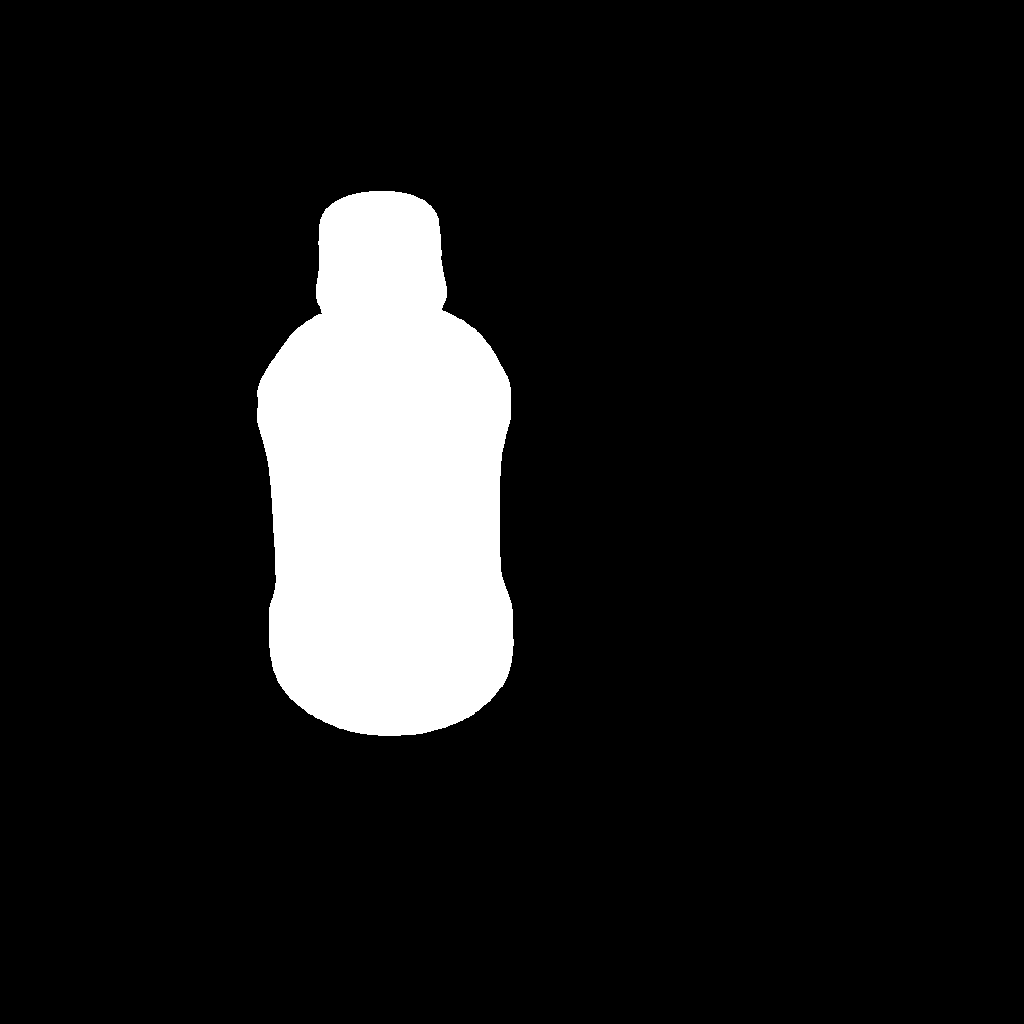

In [10]:
text2segment_mask_images[0]

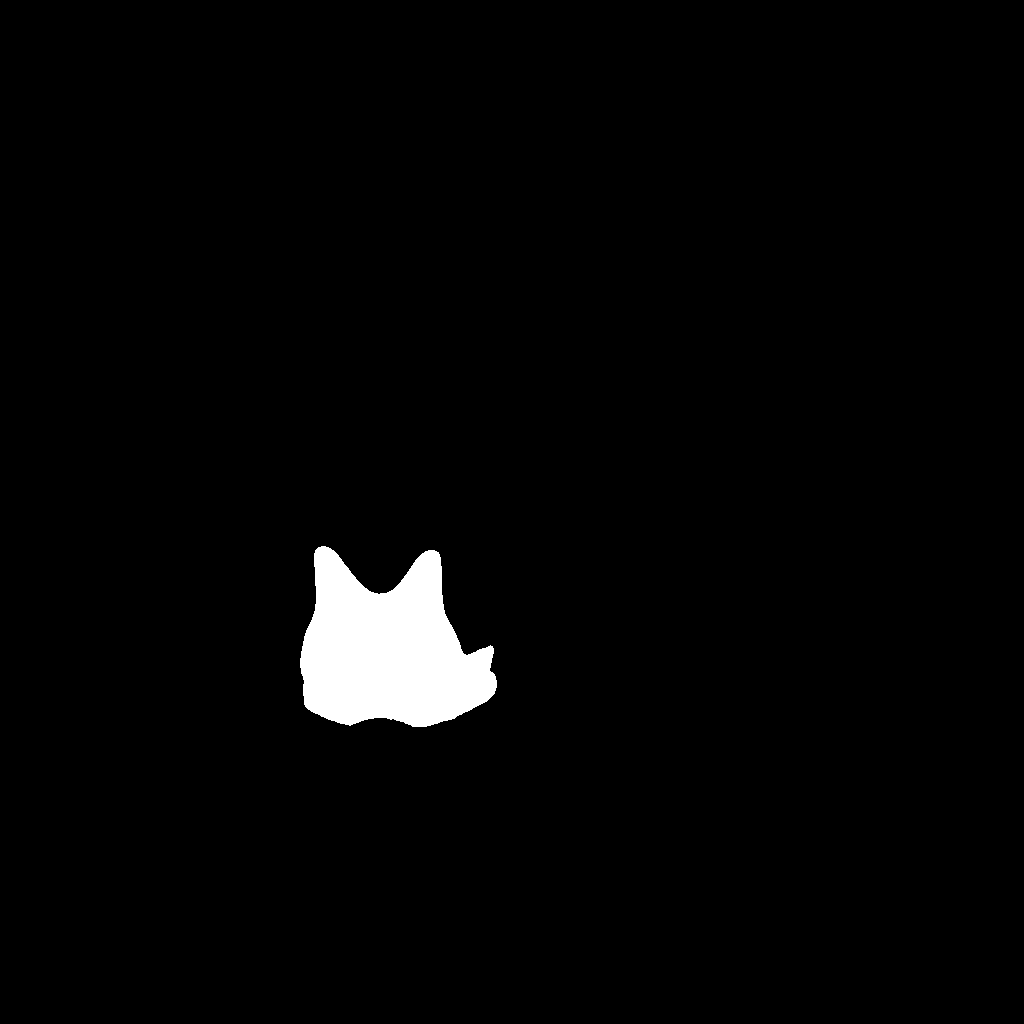

In [11]:
text2segment_mask_images[1]

In [12]:
# ForegroundSegment
foreground_segment_request = ForegroundSegmentRequest(
    image=image,
    segmenter_type=SegmenterType.BIREFNET,
)
foreground_segment_request_data = foreground_segment_request.model_dump()


In [13]:
print(foreground_segment_request_data["segmenter_type"])
print(foreground_segment_request_data["image"][:30])

birefnet
iVBORw0KGgoAAAANSUhEUgAABAAAAA


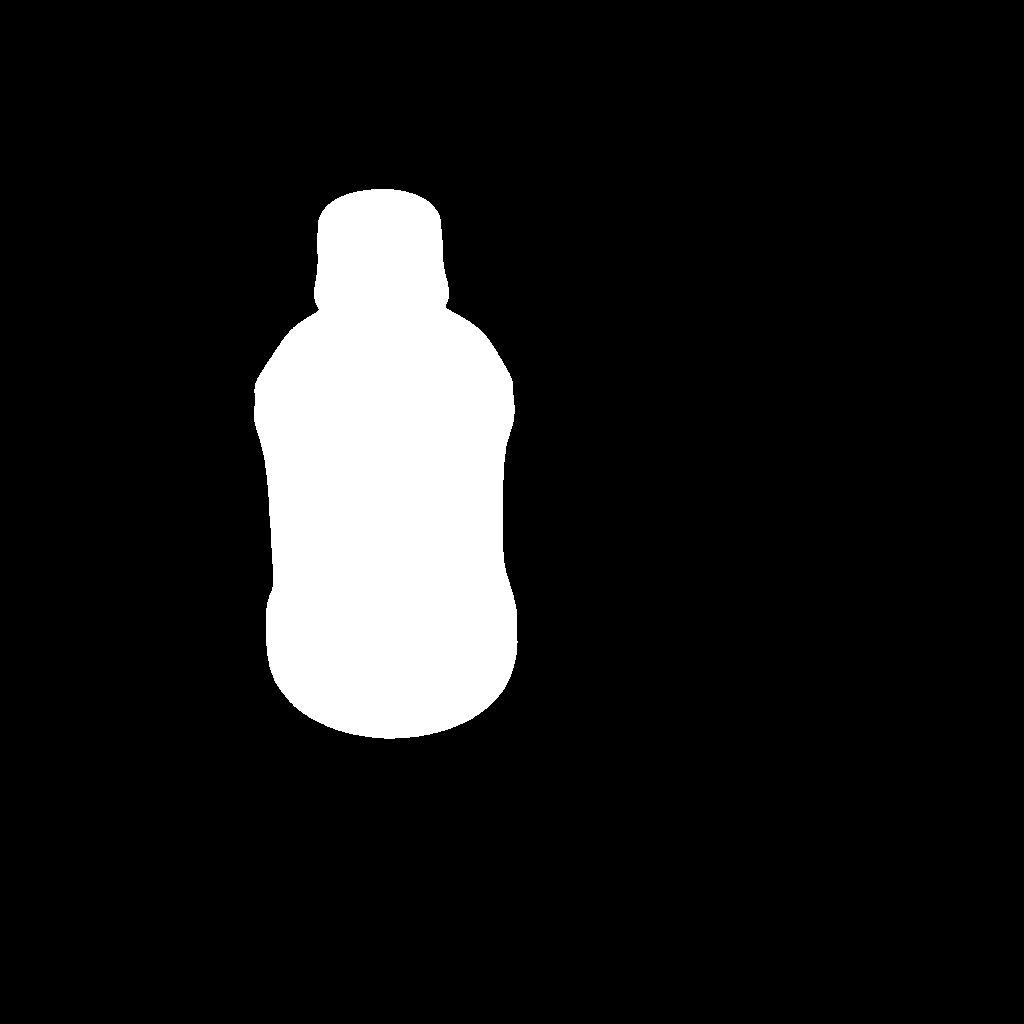

In [14]:
foreground_segment_response = requests.post(
    foreground_segment_url, json=foreground_segment_request_data
)
foreground_segment_response_data = foreground_segment_response.json()
foreground_segment_mask = foreground_segment_response_data["mask"]
foreground_segment_mask_image = boolean2image(foreground_segment_mask)
foreground_segment_mask_image
